### Problem Statment 

x Company's 2014-2018 sales date to identify key revenue and profit
drivers accross products, channels, and regions, uncover seasonal trends
and oultiers and align performance against budget. use these insights to optimize 
pricing, promotions and market expanstion for suitable growth and reduced concentration


In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pylab as plt


sns.set_style('whitegrid')


In [2]:
# Loading data

sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name =None)

In [3]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets= sheets['2017 Budgets']

In [4]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [5]:
print('df_sales shape:', df_sales.shape)
print('df_customers:', df_customers.shape)
print('df_products:', df_products.shape)
print('df_regions: ',df_regions.shape)
print('df_state_reg:', df_state_reg.shape)
print('df_budgets: ',df_budgets.shape)

df_sales shape: (64104, 12)
df_customers: (175, 2)
df_products: (30, 2)
df_regions:  (994, 15)
df_state_reg: (49, 3)
df_budgets:  (30, 2)


In [6]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [8]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [9]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [10]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [11]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [12]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [14]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [15]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

### Data Cleaning and Wrangling

In [17]:
# Merging with Customers
df= df_sales.merge(df_customers, 
                   how= 'left', 
                  left_on= 'Customer Name Index' ,
                 right_on='Customer Index')
df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [18]:
# Merging Sales with Products
df= df.merge(df_products, 
                   how= 'left', 
                  left_on= 'Product Description Index' ,
                 right_on='Index')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [19]:
# Merging with Regions
df= df.merge(df_regions, 
                   how= 'left', 
                  left_on= 'Delivery Region Index' ,
                 right_on='id')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [20]:
# Merging with Budgets
df= df.merge(df_budgets, 
                   how= 'left', 
                on= 'Product Name')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329


In [21]:
# Merging with State Region
df= df.merge(df_state_reg[["State Code", "Region"]], 
                   how= 'left', 
                  left_on= 'state_code' ,
                 right_on='State Code')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,CT,Northeast


In [22]:
# Clean up redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'State','State Code' ]


df= df.drop(columns=cols_to_drop, errors= 'ignore')
df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329,Northeast


In [23]:
# convert all columns to lower case

df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', '2017 budgets', 'region'],
      dtype='object')

In [24]:
# Keeping the important columns only

cols_to_keep = ['ordernumber', 'orderdate', 'customer names', 'channel', 'product name', 'order quantity', 'unit price', 'line total', 'total unit cost', 'state_code', 'county', 'state', 'region', 'latitude', 'longitude', '2017 budgets']

In [25]:
cols_to_keep

['ordernumber',
 'orderdate',
 'customer names',
 'channel',
 'product name',
 'order quantity',
 'unit price',
 'line total',
 'total unit cost',
 'state_code',
 'county',
 'state',
 'region',
 'latitude',
 'longitude',
 '2017 budgets']

In [26]:
df = df[cols_to_keep]
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [27]:
# Rename Columns

df = df.rename(columns={
       'ordernumber': 'order_number',
       'orderdate': 'order_date',
       'customer names': 'customer_name',
       'product name': 'product_name',
       'order quantity': 'order_quantity',
       'unit price': 'unit_price', 
       'line total': 'revenue',
       'state_code':'state',
       'state': 'state_name',
       'latitude': 'lat',
       'longitude': 'lon',
       '2017 budgets': 'budget',
       'total unit cost' : 'total_unit_cost'

}
)
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [28]:
# Blank out budget for non-2017 orders

df.loc[df['order_date'].dt.year != 2017, 'budget' ] = pd.NA
df[['order_date', 'product_name', 'revenue', 'budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [30]:
# Filter the dataset to include only records from year 2017

df = df[df['order_date'].dt.year == 2017]

In [31]:
df.isnull().sum()

order_number       0
order_date         0
customer_name      0
channel            0
product_name       0
order_quantity     0
unit_price         0
revenue            0
total_unit_cost    0
state              0
county             0
state_name         0
region             0
lat                0
lon                0
budget             0
dtype: int64

Feature Engineering

In [32]:
df['total_cost'] = df['order_quantity'] * df['total_unit_cost']

In [33]:
df['profit']= df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

In [34]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684,6172.710,1264.290,17.0
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645,6036.030,3109.470,34.0
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315,14978.520,6729.480,31.0
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329,6005.880,1230.120,17.0
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565,9742.872,3603.528,27.0


## EDA

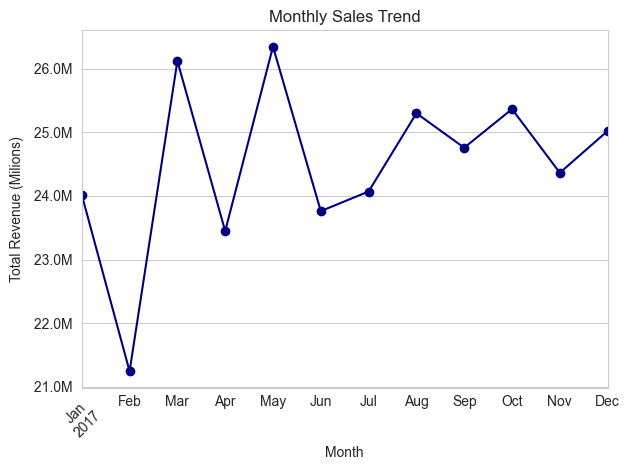

In [35]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figsize = (15,4)
monthly_sales.plot(marker = 'o', color = 'navy')

formatter = FuncFormatter(lambda x, pos: f'{x/1e6: .1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Milions)')

plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [36]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684,6172.710,1264.290,17.0,2017-01
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645,6036.030,3109.470,34.0,2017-01
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315,14978.520,6729.480,31.0,2017-01
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329,6005.880,1230.120,17.0,2017-01
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565,9742.872,3603.528,27.0,2017-01


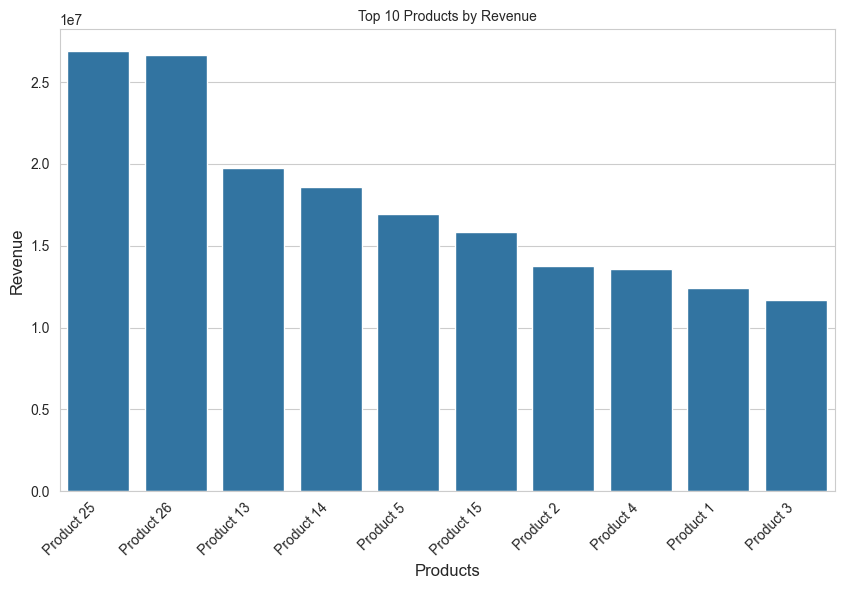

In [37]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by= 'revenue', ascending= False).head(10) 

plt.figure(figsize=(10,6))
sns.barplot(data = top_10_products, x= 'product_name', y= 'revenue')
plt.title('Top 10 Products by Revenue', fontsize= 10)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation = 45, ha= 'right')
plt.show()

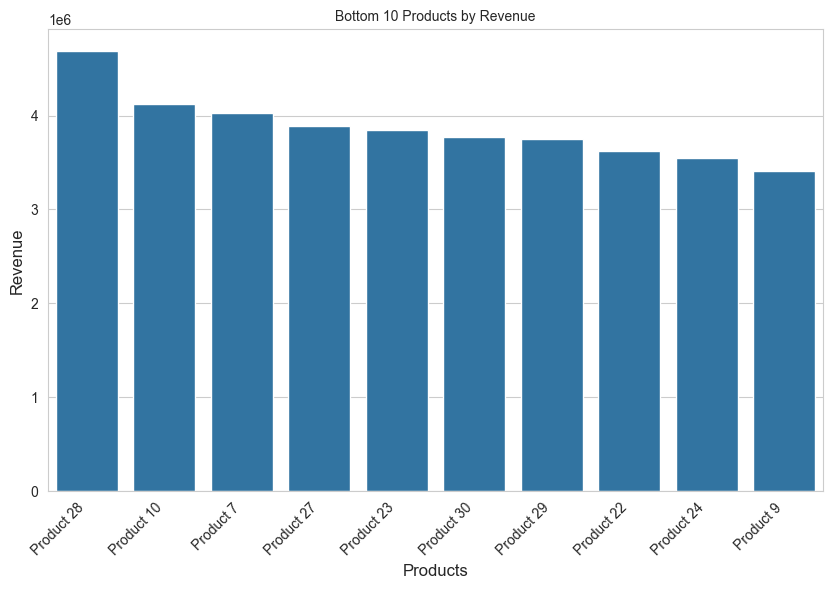

In [38]:
bottom_10_products = product_revenue.sort_values(by= 'revenue', ascending= False).tail(10) 

plt.figure(figsize=(10,6))
sns.barplot(data = bottom_10_products, x= 'product_name', y= 'revenue')
plt.title('Bottom 10 Products by Revenue', fontsize= 10)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation = 45, ha= 'right')
plt.show()

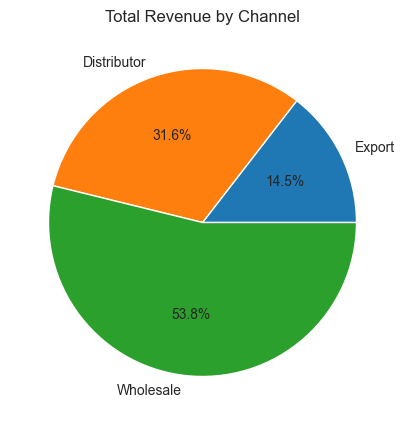

In [39]:
# Revenue by Channel

chan_reve = df.groupby('channel')['revenue'].sum().sort_values(ascending= True)

plt.figure(figsize=(5,5))

plt.pie(chan_reve, labels= chan_reve.index, autopct='%1.1f%%')
plt.title('Total Revenue by Channel')
plt.show()


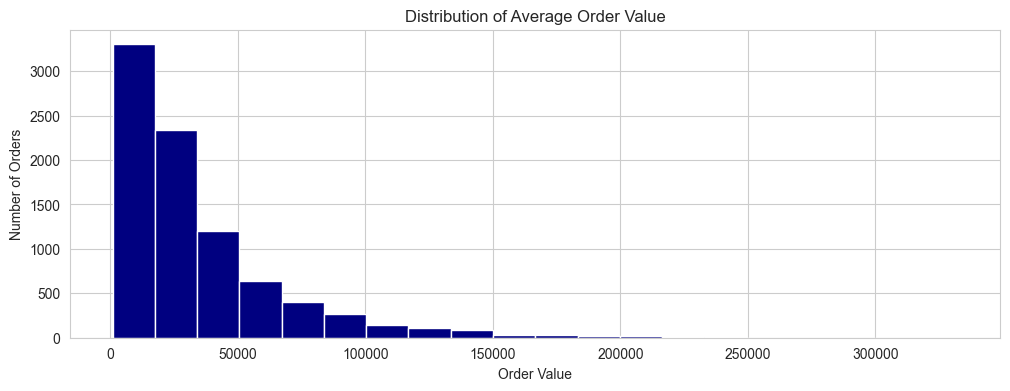

In [40]:
# Average Order Value Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))


plt.hist(
    aov,
    bins= 20,
    color= 'navy'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value')
plt.ylabel('Number of Orders')
plt.show()

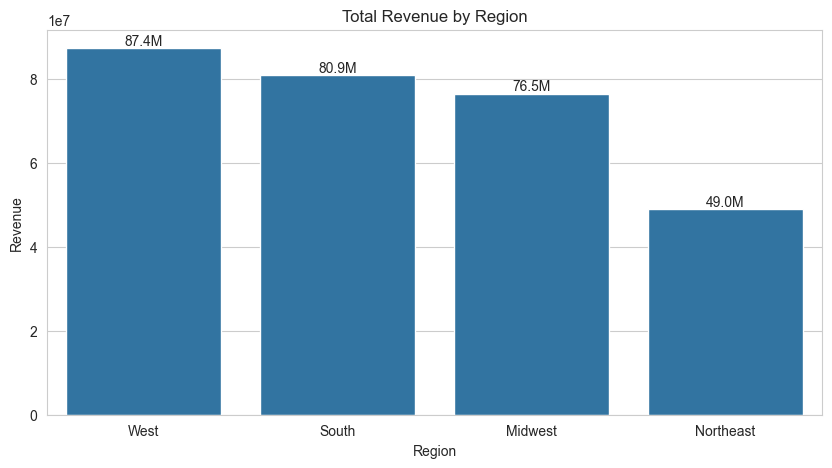

In [41]:
regions_reve= df.groupby('region')['revenue'].sum().sort_values(ascending= False)

plt.figure(figsize= (10,5))

ax = sns.barplot(x=regions_reve.index, y=regions_reve.values)
ax.bar_label(ax.containers[0], labels=[f'{v/1e6:.1f}M' for v in regions_reve.values])

plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')

plt.show()

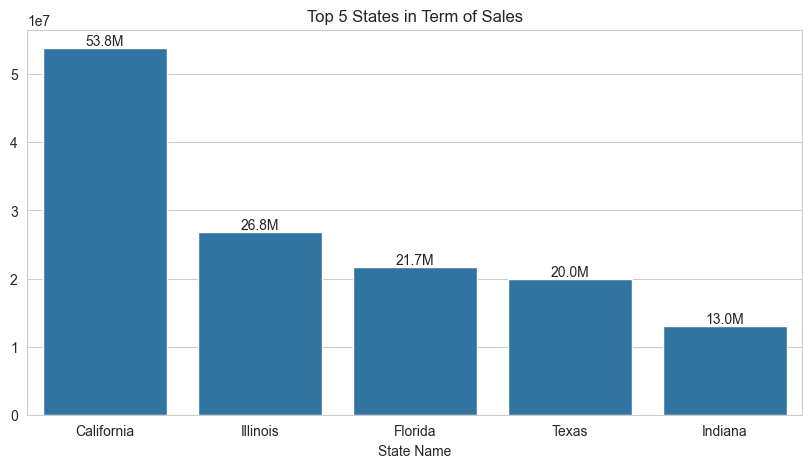

In [42]:
# Top Performing States in Sales

top_state = df.groupby('state_name')['revenue'].sum().sort_values(ascending= False).head(5)

plt.figure(figsize=(10,5))

ax= sns.barplot(x= top_state.index, y= top_state.values)
ax.bar_label(ax.containers[0], labels=[f'{v/1e6:.1f}M' for v in top_state.values])
plt.title('Top 5 States in Term of Sales')
plt.xlabel('State Name')
plt.show()

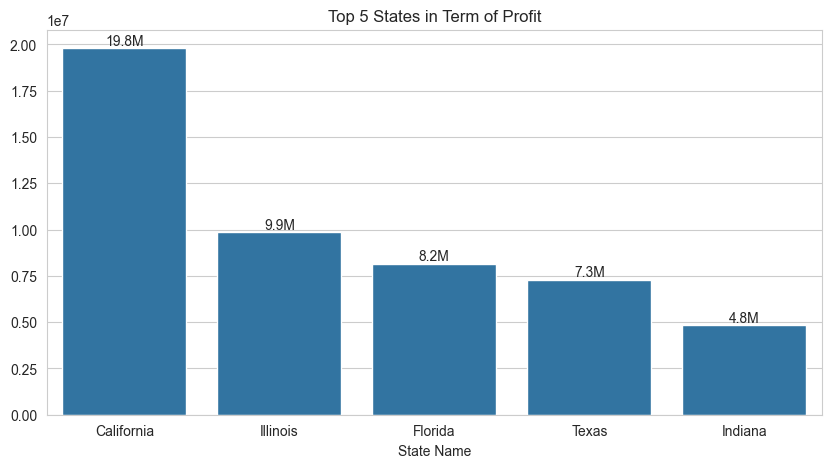

In [43]:
# Top Performing States in Profit

top_state = df.groupby('state_name')['profit'].sum().sort_values(ascending= False).head(5)

plt.figure(figsize=(10,5))

ax= sns.barplot(x= top_state.index, y= top_state.values)
ax.bar_label(ax.containers[0], labels=[f'{v/1e6:.1f}M' for v in top_state.values])
plt.title('Top 5 States in Term of Profit')
plt.xlabel('State Name')
plt.show()

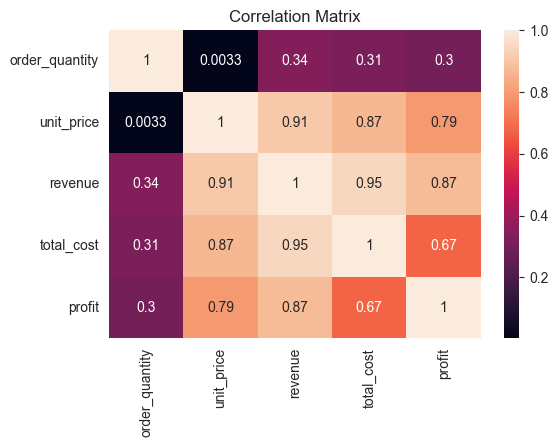

In [44]:
# Heatmap

num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))

sns.heatmap(corr, annot= True)

plt.title('Correlation Matrix')
plt.show()

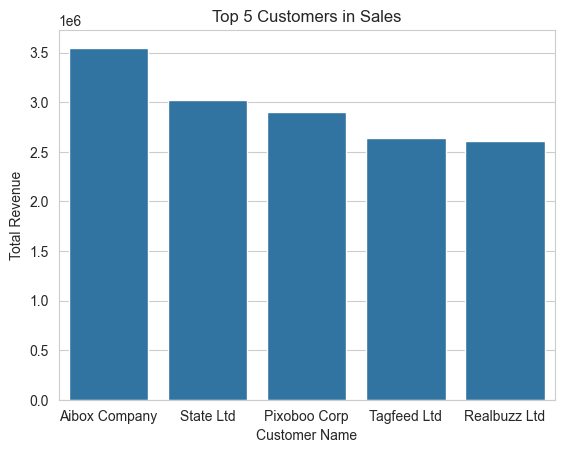

In [45]:
# Top 5 Customers in term of Sales 
top_custs_s= df.groupby('customer_name')['revenue'].sum().reset_index()
top_custs_s = top_custs_s.sort_values(by= 'revenue',ascending= False).head(5)
ax= sns.barplot(data= top_custs_s, x= 'customer_name', y= 'revenue')
plt.title('Top 5 Customers in Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.show()

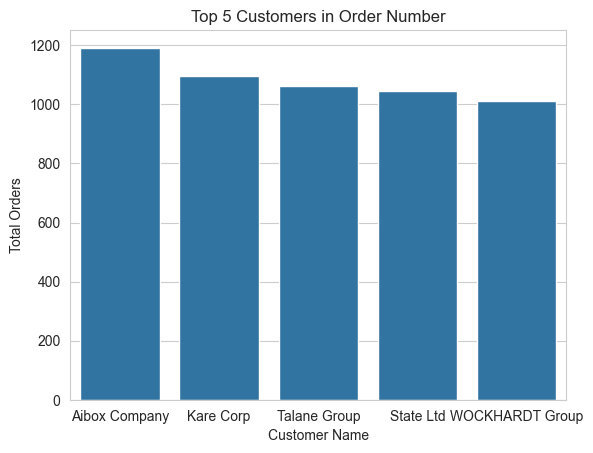

In [46]:
# Top 5 Customers in term of Order Number
top_custs_o= df.groupby('customer_name')['order_quantity'].sum().reset_index()
top_custs_o = top_custs_o.sort_values(by= 'order_quantity',ascending= False).head(5)
ax= sns.barplot(data= top_custs_o, x= 'customer_name', y= 'order_quantity')
plt.title('Top 5 Customers in Order Number')
plt.xlabel('Customer Name')
plt.ylabel('Total Orders')
plt.show()

## Some Insights

Highest channel is: Wholesale holding 54%

Highest month in sales is: May having 26,348,721.5 $


Top performing products: ['Product 25','Product 26','Product 13','Product 14','Product 5','Product 15','Product 4','Product 2','Product 1','Product 3']

Worst performing products:['Product 28','Product 10','Product 7','Product 27','Product 23','Product 30','Product 29','Product 22','Product 24','Product 9']

Highest sales region is: West

Highest sales state is: California

Top 5 customers in sales: ['Aibox Company', 'State Ltd', 'Pixoboo Corp', 'Tagfeed Ltd', 'Realbuzz Ltd']

Top 5 customers in number of orders: ['Aibox Company', 'Kare Corp', 'Talane Group', 'State Ltd', 'WOCKHARDT Group']